<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)


In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [3]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...


In [4]:
max_features = 20000
maxlen = 80
batch_size = 32

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 80)
X_test shape: (2246, 80)


In [5]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 8982 samples, validate on 2246 samples
Epoch 1/15


InvalidArgumentError:  indices[30,26] = 20445 is not in [0, 20000)
	 [[node embedding/embedding_lookup (defined at <ipython-input-5-01eb43344d25>:9) ]] [Op:__inference_keras_scratch_graph_1946]

Function call stack:
keras_scratch_graph


In [ ]:
# pip install tensorflow==2.0.0-beta1

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

### This function transforms a list of num_samples sequences into a 2D Numpy array 

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

### LSTM networks have some internal contextual state cells that act as long-term or short-term memory cells. And RNNs suffer from vanishing and exploding gradient problems.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

Please add your answer in markdown here.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [6]:
!pip install google_images_download

In [7]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "lilly frog pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = lilly frog pond
Evaluating...
Starting Download...
Image URL: https://img-aws.ehowcdn.com/350x235p/photos.demandstudios.com/getty/article/110/213/78036715_XS.jpg
Completed Image ====> 1.78036715_XS.jpg
Image URL: https://www.maxpixel.net/static/photo/1x/Nature-Bull-Frog-Pond-Green-Lily-Pad-Frog-2526024.jpg
Completed Image ====> 2.Nature-Bull-Frog-Pond-Green-Lily-Pad-Frog-2526024.jpg
Image URL: https://c8.alamy.com/comp/C63A50/green-frog-floating-on-a-water-lily-pad-in-a-pond-with-pink-flowers-C63A50.jpg
Completed Image ====> 3.green-frog-floating-on-a-water-lily-pad-in-a-pond-with-pink-flowers-C63A50.jpg
Image URL: https://cdn.pixabay.com/photo/2018/07/29/16/11/water-lilies-3570439_960_720.jpg
Completed Image ====> 4.water-lilies-3570439_960_720.jpg
Image URL: https://www.welcomewildlife.com/wp-content/uploads/2015/01/Frog-on-lily-pad.jpg
Completed Image ====> 5.Frog-on-lily-pad.jpg

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals* 
- Check for fish or other labels
- Create a matplotlib visualizations of the images and your prediction as the visualization label

In [9]:
# You've got something to do in this cell. ;)

from PIL import Image, ImageOps
import os
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from matplotlib.pyplot import imshow

path = './downloads/lilly frog pond/'

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

model = ResNet50(weights='imagenet')

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a integer with the number of frogs detected in an
    image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    # Your Code Here
    # TODO - your code!
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    results = decode_predictions(features, top=5)[0]
    return results

files = []
results = {}

for file in os.listdir(path):
    filename= path+file
    files.append(filename)
    img = process_img_path(filename)
    results[filename] = img_contains_frog(img)
    
for key in results.keys():
    files.append(key)

Using TensorFlow backend.


In [10]:
def display_image(path):
    pil_im = Image.open(path)
    imshow(np.asarray(pil_im));

bee: 32.9%
daisy: 8.27%
pot: 6.7%
cucumber: 6.25%
cabbage_butterfly: 5.62%


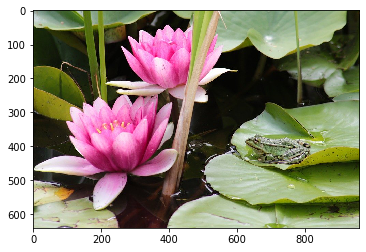

In [11]:
for pred in results[files[0]]:
    print(str(pred[1]) + ': ' + str(round(pred[2]*100,2)) + '%')
display_image(files[0])

tennis_ball: 80.45%
pot: 19.15%
water_snake: 0.11%
earthstar: 0.04%
bullfrog: 0.04%


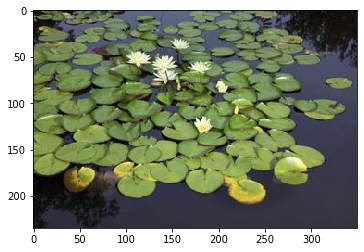

In [12]:
for pred in results[files[1]]:
    print(str(pred[1]) + ': ' + str(round(pred[2]*100,2)) + '%')
display_image(files[1])

fly: 15.34%
water_snake: 9.14%
zucchini: 8.67%
cucumber: 8.51%
pot: 5.55%


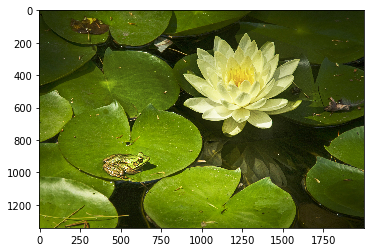

In [13]:
for pred in results[files[3]]:
    print(str(pred[1]) + ': ' + str(round(pred[2]*100,2)) + '%')
display_image(files[3])

#### Stretch Goal: Displaying Predictions

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

### Used to reduce the dimensionality of a dataset by figuring out complex patterns among the variables

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

### 1) evaluates the problem we have and choising the rights tools (model) to find the best solution. 

- What area of Data Science would you most like to learn more about, and why?

### 2) deep learning and machine learning


- Where do you think Data Science will be in 5 years?

### 3) I think most of the company will try to implement Data science.
### they'll realise the value of this great tools that data science can provide.

- What are the threats posed by AI to our society?

### 4)  Autonomous weapons are artificial intelligence systems that are programmed to kill

- How do you think we can counteract those threats?

### 5) We need to be cautious for who we are working and giving this tools

- Do you think achieving General Artifical Intelligence is ever possible?

### 6) Yes, I think It will be possible, maybe 5 to 10 years will some good prototype created

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [6]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")